In [66]:
import sympy as sp
import sympy.vector as vc
from examples.ArtificialMusclesCases.muscle.muscle_fiber_init_symbolic import (
    get_fiber_geometry_symbolic_representation,
    get_fiber_geometry_based_on_symbolic_representation,
)
from examples.ArtificialMusclesCases import *
import numpy as np


In [67]:
test_muscle = Samuel_monocoil()
offset_list = [test_muscle.geometry.angular_offset]
# def centerline_f(s,N):
#     return sp.cos(10*s)*N.i + sp.sin(10*s)*N.j + 0*N.k

def centerline_f(s,N):
    return s*N.i + 1e2*s**2*N.j + 0*N.k
    
position_symbolic,distance_function = get_fiber_geometry_symbolic_representation(
    test_muscle.geometry.start_radius_list,
    test_muscle.geometry.taper_slope_list,
    centerline_f,
    offset_list,
    test_muscle.geometry.turns_per_length_list,
    test_muscle.geometry.CCW_list,)

100%|██████████| 1/1 [00:00<00:00, 12.18it/s]


In [68]:
muscle_length = test_muscle.geometry.muscle_length
n_elem = int(test_muscle.sim_settings.n_elem_per_coil*test_muscle.geometry.turns_per_length_list[0]*muscle_length)
fiber_length, start, position_collection, director_collection, intrinsic_link, injected_twist = get_fiber_geometry_based_on_symbolic_representation(
    distance_function,
    position_symbolic,
    n_elem,
    test_muscle.geometry.start_radius_list,
    test_muscle.geometry.taper_slope_list,
    np.zeros(3),
    offset_list,
    muscle_length,
    np.array(test_muscle.geometry.turns_per_length_list),
    test_muscle.geometry.initial_link_per_fiber_length,
    test_muscle.geometry.CCW_list,
    check_twist_difference=False,
    )

3.3306690738754696e-16
2.220446049250313e-16
-1.0408340855860843e-17
-2.740863092043355e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
1.6653345369377348e-16
-1.8041124150158794e-16
7.632783294297951e-17
-3.634245682171411e-16
-2.8449465006019636e-16
2.220446049250313e-16
-1.6653345369377348e-16
0.0
1.249000902703301e-16
0.0
-5.551115123125783e-17
3.3306690738754696e-16
1.3877787807814457e-16
-1.0408340855860843e-16
5.204170427930421e-18
1.682681771697503e-16
2.255140518769849e-16
4.163336342344337e-17
0.0
-2.220446049250313e-16
5.551115123125783e-17
6.245004513516506e-17
-5.551115123125783e-16
2.220446049250313e-16
-1.3877787807814457e-16
2.498001805406602e-16
-1.2836953722228372e-16
-1.3097162243624894e-16
-3.469446951953614e-17
-3.469446951953614e-17
-3.3306690738754696e-16
-1.6653345369377348e-16
-5.551115123125783e-17
1.0408340855860843e-16
0.0
5.551115123125783e-16
-1.942890293094024e-16
6.938893903907228e-17
4.163336342344337e-17
-1.7780915628762273e-16
5.551115123125783e-1

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline



In [70]:
position_collection.shape

(3, 151)

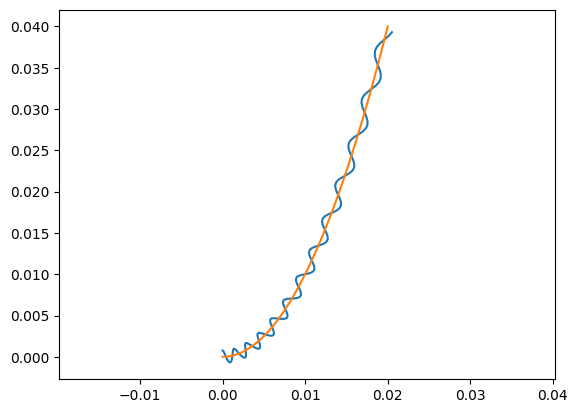

In [71]:
ax = plt.figure().add_subplot()
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(position_collection[0,:],position_collection[1,:],position_collection[2,:])
ax.plot(position_collection[0,:],position_collection[1,:])
s = sp.symbols("s")
N = vc.CoordSys3D("N")
def np_lambdify(varname, func):
    lamb = sp.lambdify(varname, func, modules=['numpy'])
    if func.is_constant():
        return lambda t: np.full_like(t, lamb(t))
    else:
        return lambda t: lamb(np.array(t))
centerline_x = np_lambdify(s, centerline_f(s,N) & N.i)
centerline_y = np_lambdify(s, centerline_f(s,N) & N.j)
S = np.linspace(0,muscle_length,n_elem)
ax.plot(centerline_x(S),centerline_y(S))
ax.axis('equal')

plt.show()